<center><h1>Covid-19 Infección en Francia</h1></center>
<center><h2>Prueba Primer Interciclo</h2></center>

Objetivo:

- Consolidar los conocimientos adquiridos en clase para desarrollar simulaciones.
Enunciado:

Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:
Investigar los datos de los paises contigados por COVID-19, especialmente de latinoamerica (menos Ecuador), deberán escoger uno y que no se repita, para ello se va a seleccionar el orden en el que publique dentro del foro “Tema prueba 1”, con estos datos obtener los siguientes modelos:
- Generar un modelo matematico de prediccion para regresion lineal, exponencial, polinomico y logaritmico, de los nuevos contactos en la proxima semana (7 dias despues).
- Generar un modelo probabilistico con los datos.
- Finalmente, contrarestar los modelos matematicos y generar las siguientes conclusiones
- Cual tiene una mejor prediccion
- Ventajas y desventajas de los modelos.
- Cual es el principal problema del modelo probabilistico
- El proceso de simulación desarrollado deberá considerar los siguientes aspectos:
- Se debe establecer un modelo basado en modelos matematicos y probabilisticos.
- El programa deberá generar gráficas que indiquen la ecuacion matematica y probabilistica de tendencias.
Deben calcularse las siguientes métricas:
- Total de infectados dentro de 7 dias (matematico y probabilistico).
- Finalmente, desarrollar dentor de un cuaderno de Jupyter Notebook, generar un PDF y subir al repositorio.

La fecha de entrega es 24/11/20 antes o igual de las 13:00.

Cualquier pregunta que tengan no olviden en realizar por cualquier medio electronico.

## Desarrollo de la prueba

Vamos a improtar todas las libreriasque se vana  necesitar

In [28]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import sympy as sp
from pylab import *
from scipy.optimize import curve_fit
from sklearn.linear_model import LogisticRegression

%matplotlib inline  

## Vamos a leer los datos del curpus que  vamso a a utilizar

In [29]:
df = pd.read_csv('owid-covid-data.csv').fillna(0)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,0.000,0.0,0.0,0.0,...,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
1,ABW,North America,Aruba,2020-03-19,0.0,0.0,0.286,0.0,0.0,0.0,...,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
3,ABW,North America,Aruba,2020-03-21,0.0,0.0,0.286,0.0,0.0,0.0,...,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
4,ABW,North America,Aruba,2020-03-22,0.0,0.0,0.286,0.0,0.0,0.0,...,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54385,0,0,International,2020-10-30,696.0,0.0,0.000,7.0,0.0,0.0,...,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
54386,0,0,International,2020-10-31,696.0,0.0,0.000,7.0,0.0,0.0,...,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
54387,0,0,International,2020-11-01,696.0,0.0,0.000,7.0,0.0,0.0,...,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
54388,0,0,International,2020-11-02,696.0,0.0,0.000,7.0,0.0,0.0,...,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0


Vamos a  separar los datos por el pais que nso toco  como ya  todo  los paises fueron escogidos  nos vamos a escoger un pais europeo

In [30]:
ndf= df.loc[(df['location'] == 'France') & (df['total_cases'] != 0)] 
ndf

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
17086,FRA,Europe,France,2020-01-25,3.0,3.0,0.429,0.0,0.0,0.000,...,38605.671,0.0,86.06,4.77,30.1,35.6,0.0,5.98,82.66,0.901
17087,FRA,Europe,France,2020-01-26,3.0,0.0,0.429,0.0,0.0,0.000,...,38605.671,0.0,86.06,4.77,30.1,35.6,0.0,5.98,82.66,0.901
17088,FRA,Europe,France,2020-01-27,3.0,0.0,0.429,0.0,0.0,0.000,...,38605.671,0.0,86.06,4.77,30.1,35.6,0.0,5.98,82.66,0.901
17089,FRA,Europe,France,2020-01-28,3.0,0.0,0.429,0.0,0.0,0.000,...,38605.671,0.0,86.06,4.77,30.1,35.6,0.0,5.98,82.66,0.901
17090,FRA,Europe,France,2020-01-29,4.0,1.0,0.571,0.0,0.0,0.000,...,38605.671,0.0,86.06,4.77,30.1,35.6,0.0,5.98,82.66,0.901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17365,FRA,Europe,France,2020-10-30,1282769.0,47637.0,40532.286,36020.0,235.0,258.571,...,38605.671,0.0,86.06,4.77,30.1,35.6,0.0,5.98,82.66,0.901
17366,FRA,Europe,France,2020-10-31,1331984.0,49215.0,41558.429,36565.0,545.0,293.857,...,38605.671,0.0,86.06,4.77,30.1,35.6,0.0,5.98,82.66,0.901
17367,FRA,Europe,France,2020-11-01,1364625.0,32641.0,39732.571,36788.0,223.0,306.143,...,38605.671,0.0,86.06,4.77,30.1,35.6,0.0,5.98,82.66,0.901
17368,FRA,Europe,France,2020-11-02,1413915.0,49290.0,39344.000,37019.0,231.0,322.571,...,38605.671,0.0,86.06,4.77,30.1,35.6,0.0,5.98,82.66,0.901


### vamos a exportar los datos que  vamos a necesitar

In [31]:
ndf1=ndf[['date','total_cases']]
nombre=["Fecha", "Total de Infectados"]
ndf1.columns=nombre
ndf1

,Fecha,Total de Infectados
17086,2020-01-25,3.0
17087,2020-01-26,3.0
17088,2020-01-27,3.0
17089,2020-01-28,3.0
17090,2020-01-29,4.0
...,...,...
17365,2020-10-30,1282769.0
17366,2020-10-31,1331984.0
17367,2020-11-01,1364625.0
17368,2020-11-02,1413915.0


###  Vamos a crear los arreglos que vamos a necesitar para nuestas simulacion

In [32]:
x=np.arange(1,len(ndf1)+1,1) 
y=np.array(ndf1.values[:,1], dtype='float')

## Grafica de los  datos que vamos a simular

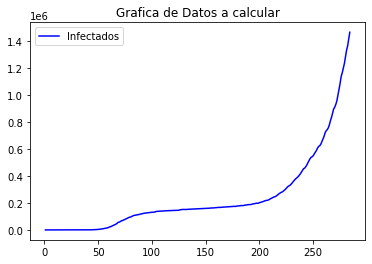

In [91]:
def f(x): 
    np.random.seed(42)
    y = 0.1*x + 1.25 + 0.2*np.random.randn(x.shape[0])
    return y

plt.title("Grafica de Datos a calcular")
plt.plot(x,y,label='Infectados', color='blue')
plt.legend()

## Una ves ya leidos los datos que necesitamos para nuestra simulacion y  creado los arreglos que necesitamos para la simulacion  vamos  a prosegir con la elaboracion de regrsion que nso esta pidiendo en la prueba 

# Regresion lineal 

Vamos a crear una instanacia de par ala regresion lienal y vamos a ingresar lso datos que  extraimos del corpus  

In [34]:
regresion_lineal = LinearRegression() 
regresion_lineal.fit(x.reshape(-1,1), y) 

LinearRegression()

In [35]:
if (regresion_lineal.intercept_ < 0):
    ecua='y = {}x {}'
else:
    ecua='y = {}x + {}'

### Graficas de la Regresion Lienal

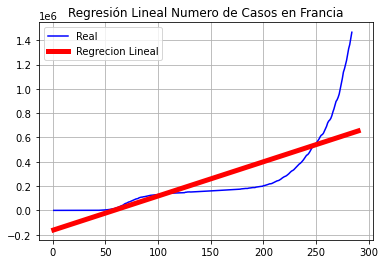

In [36]:
fun= lambda num: regresion_lineal.coef_[0]*num+regresion_lineal.intercept_
plt.plot(x,y,label='Real', color='blue')
plt.grid(True)
plt.title('Regresión Lineal Numero de Casos en Francia');
x1=np.arange(1,len(ndf1)+7,1)
y1=fun(x1)
plt.plot(x1,y1,color='red',linewidth=5.0,label='Regrecion Lineal')
plt.legend()
plt.show()

## Regresión Logaritmica

Vamos a elaborar una funcion  con nombre de modelo_logistico

In [40]:
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

Ahora vamos a sacar los datos para ver como se puede desarrollar  la regresion logaritmica

In [41]:
exp_fit = curve_fit(modelo_logistico,x,y)

### Graficas de Regresion Logistico

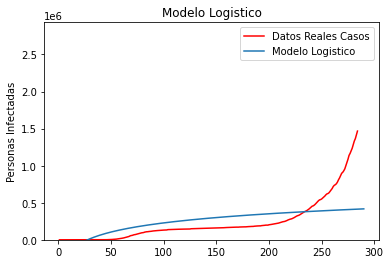

In [45]:
pred_x = list(range(min(x),max(x)+7))
plt.plot(x,y,label="Datos Reales Casos",color="red")
pred_y=[modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x]
plt.plot(pred_x, pred_y, label="Modelo Logistico" )
plt.title("Modelo Logistico")
plt.legend()
plt.ylabel("Personas Infectadas")
plt.ylim(0,max(y)*2) 
plt.show()

# Modelo Exponencial

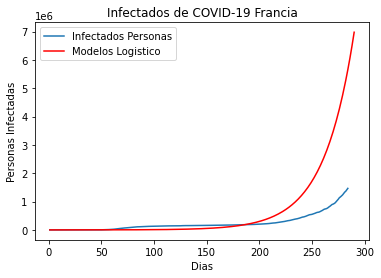

In [67]:
curve_fit=np.polyfit(x,np.log(y),1)
predXE=np.array(list(range(min(x),max(x)+7)))
exyx=np.exp(curve_fit[1])*np.exp(curve_fit[0]*predXE)
plt.title('Infectados de COVID-19 Francia')
plt.plot(x,y,label="Infectados Personas")
plt.plot(predXE,exyx,color='red',label="Modelos Logistico")
plt.xlabel('Dias')
plt.ylabel('Personas Infectadas')
plt.legend()


## Modelo Polinomial

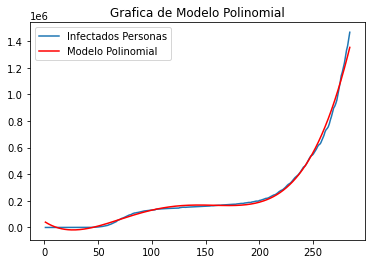

In [68]:
fun1 = np.poly1d(np.polyfit(x, y, 4))
yPoli=fun1(x)
plt.plot(x, y,label="Infectados Personas")
plt.plot(x, yPoli, color='red',label="Modelo Polinomial ")  
plt.title("Grafica de Modelo Polinomial")
plt.legend()
plt.show()

Calcular 7 dias mas del qeu estamos

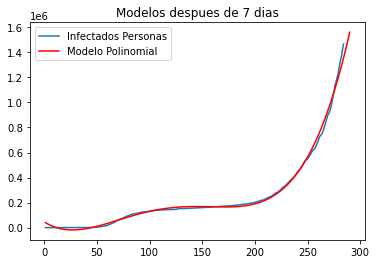

In [69]:
pred=np.array(list(range(min(x),max(x)+7)))
y_npred=fun1(pred)
plt.plot(x,y,label="Infectados Personas")
plt.plot(pred, y_npred, color='red',label="Modelo Polinomial ")
plt.title("Modelos despues de 7 dias")
plt.legend()
plt.show()

# Método Probabilistico

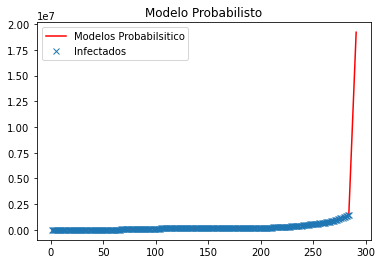

In [90]:
media = ndf1.values[:,1].mean()
mediana = np.median(ndf1.values[:,1])
for it in range(int(x[-1]), int(x[-1]+7)):
    xpro=np.append(x,(it+1))
    ypro=np.append(y,ypro[-1] + mediana)
plt.title("Modelo Probabilisto")

plt.plot(xpro,ypro,color= "red",label="Modelos Probabilsitico" )
plt.plot(x,y,'x',label="Infectados")
plt.legend()
plt.show()


# Conclucion

Como concluion el mejor  modelo es el modelo polinomial ya que tiene una mejr eficiencia tanto como  el en tamaño de muestra es uno de los modelos que se desarrolla mejor en  datos que no  son leneales y  por lo tanto es uno es un modelo que  sirve para este tipo de problema que es la pandemia conoicada como COVID-19.
